In [1]:
import sys
sys.path.append("../")
from linkage.linkage import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

%load_ext autoreload
%autoreload 2


#### Construct dataset display it

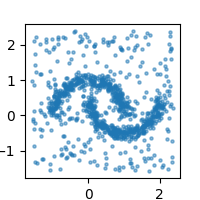

In [2]:
from sklearn import datasets

N_DATAPOINTS = 1000

n_true_points = int(N_DATAPOINTS * 0.7) ; X, _ = datasets.make_moons(n_samples=n_true_points, noise=0.1, random_state=0)
np.random.seed(0) ; n_noise = N_DATAPOINTS - n_true_points ; noise = (np.random.random_sample((n_noise,2)) - 0.4) * 4 ; X = np.vstack((X,noise))
fig1, ax1 = plt.subplots() ; fig1.set_figheight(2) ; fig1.set_figwidth(2)
_ = plt.scatter(X.T[0], X.T[1], s=5, alpha = 0.5)

We run the algorithm with several choices of curve to see the evolution of the cluster structure as we vary the parameter. We see that there are two high persistence vines well separated from the rest.

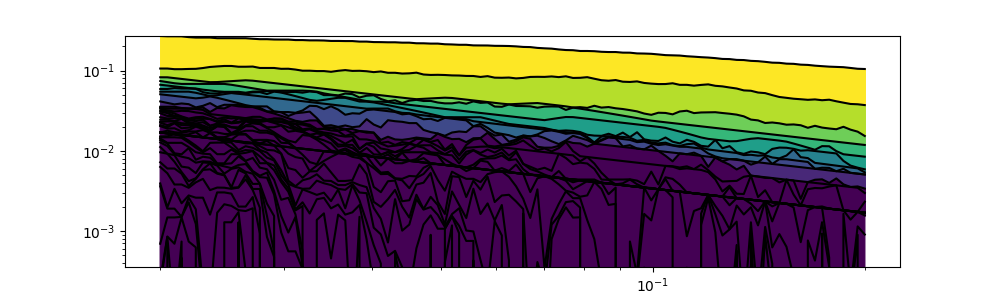

In [3]:
p = Persistable(X)
p.parameter_selection()

In [3]:
c  = p.cluster(num_clusters = 2, k = 0.045)

NameError: name 'p' is not defined

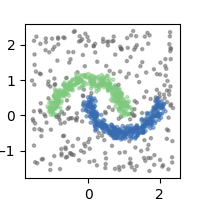

In [5]:
fig1, ax1 = plt.subplots() ; fig1.set_figheight(2) ; fig1.set_figwidth(2)
_ = plt.scatter(X.T[0], X.T[1], s=5, alpha = 0.5, c = -c[1], cmap="Accent")

In [6]:
from sklearn.neighbors import KDTree
from linkage.from_hdbscan._hdbscan_boruvka import KDTreeBoruvkaAlgorithm

points = np.array([[0,0],[0,0.5],[0,1],[1,0],[1,1],[2,2]])

X = KDTree(points)

A = KDTreeBoruvkaAlgorithm(X, [2.82842712, 2.5, 2.23606798, 2.23606798, 1.41421356, 2.82842712], np.array([[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5]]))
A.spanning_tree()

/var/folders/54/vxgwxr5943zb3yr6mmpzm4tw0000gn/T/ipykernel_23608/468810946.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = KDTreeBoruvkaAlgorithm(X, [2.82842712, 2.5, 2.23606798, 2.23606798, 1.41421356, 2.82842712], np.array([[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5]]))


array([[2.        , 3.        , 2.23606798],
       [2.        , 4.        , 2.23606798],
       [1.        , 2.        , 2.5       ],
       [0.        , 5.        , 2.82842712],
       [0.        , 1.        , 2.82842712]])